In [31]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [32]:
headers = ["iteration", "elite.fitness", "elite.validation_fitness", "population_size", "selection_method", "crossover_method", "crossover_rate",
                             "mutation_method", "None", "None", "mutation_rate", "phenotypic_diversity_shift", "geno_diversity", "pheno_diversity"]

In [71]:
#loading CSV of CIFO data
diversity_1 = pd.read_csv("diversity_1.csv",
                             sep= ",",
                             header = None,
                             names = headers)

diversity_4 = pd.read_csv("diversity_4.csv",
                             sep= ",",
                             header = None,
                             names = headers)

diversity_sta = pd.read_csv("diversity.csv",
                             sep= ";",
                             header = 0)

diversity_sta_2 = pd.read_csv("diversity_2.csv",
                             sep= ";",
                             header = 0)

diversity_sta_1 = pd.read_csv("diversity_3.csv",
                             sep= ";",
                             header = 0)

In [72]:
diversity_1 = diversity_1.append(diversity_4)

In [73]:
diversity_sta = diversity_sta_2.append(diversity_sta_1)

In [74]:
diversity_sta = diversity_sta.rename(index=str, columns={"Sta": "Diversity"})

In [75]:
diversity_1 = diversity_1.reset_index(drop=True)

In [92]:
diversity_sta.loc[(diversity_sta["Diversity"]> -0.1) & (diversity_sta["Diversity"]<0.1), :]

Diversity   Category  Iteration
18   -0.038804  Pheno_Sta         18
32    0.028766  Pheno_Sta         32
33   -0.025650  Pheno_Sta         33
35    0.073228  Pheno_Sta         35
64   -0.016591  Pheno_Sta         64
76   -0.077579  Pheno_Sta         76
77    0.083395  Pheno_Sta         77
83   -0.071209  Pheno_Sta         83
106  -0.008457  Pheno_Sta          6
107  -0.091813  Pheno_Sta          7
108  -0.094481  Pheno_Sta          8
109   0.095866  Pheno_Sta          9
118  -0.028182  Pheno_Sta         18
120  -0.095543  Pheno_Sta         20
130  -0.061082  Pheno_Sta         30
131   0.031048  Pheno_Sta         31
137   0.035856  Pheno_Sta         37
138  -0.046011  Pheno_Sta         38
142   0.081717  Pheno_Sta         42
167   0.071587  Pheno_Sta         67
173   0.041688  Pheno_Sta         73
193   0.068585  Pheno_Sta         93
194   0.052015  Pheno_Sta         94
212   0.003429  Pheno_Sta         12
214  -0.050400  Pheno_Sta         14
225   0.041369  Pheno_Sta         25
246   0.016399  Pheno_Sta         46
250   0.031645  Pheno_Sta         50
253   0.063586  Pheno_Sta         53
254  -0.048702  Pheno_Sta         54
..         ...        ...        ...
613  -0.045590   Geno_Sta         13
617  -0.042070   Geno_Sta         17
625  -0.070782   Geno_Sta         25
627   0.042614   Geno_Sta         27
631   0.027001   Geno_Sta         31
637   0.038256   Geno_Sta         37
639   0.098725   Geno_Sta         39
652  -0.018609   Geno_Sta         52
661  -0.091339   Geno_Sta         61
683  -0.048103   Geno_Sta         83
692   0.083447   Geno_Sta         92
694   0.082833   Geno_Sta         94
699  -0.096841   Geno_Sta         99
704  -0.042126   Geno_Sta          4
705   0.000411   Geno_Sta          5
706  -0.008079   Geno_Sta          6
708   0.031916   Geno_Sta          8
715   0.036190   Geno_Sta         15
724  -0.060141   Geno_Sta         24
725  -0.011068   Geno_Sta         25
740   0.092050   Geno_Sta         40
743   0.088810   Geno_Sta         43
761   0.052110   Geno_Sta         61
767  -0.005259   Geno_Sta         67
769   0.035715   Geno_Sta         69
773  -0.099327   Geno_Sta         73
775  -0.024139   Geno_Sta         75
780  -0.091199   Geno_Sta         80
792   0.063701   Geno_Sta         92
799   0.049624   Geno_Sta         99

[94 rows x 3 columns]

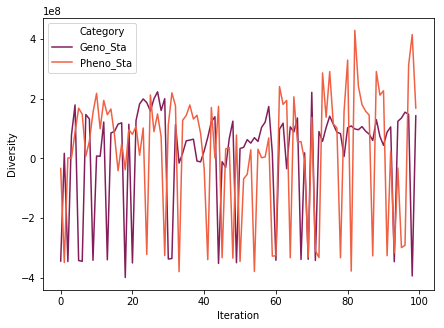

In [94]:
plt.subplots(figsize=(7,5))
sns.lineplot(x="Iteration",
                y="Diversity",
                hue="Category",
                data=diversity_sta,
               palette = "rocket",
               legend = "full",
               err_style=None

            )

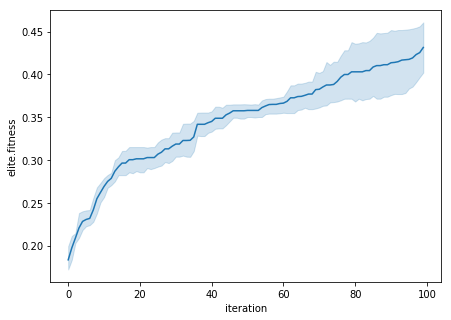

In [83]:
plt.subplots(figsize=(7,5))
sns.lineplot(x="iteration",
             y="elite.fitness",
             data=diversity_1,
            palette= "rocket",
            err_style="band",
            legend="full")

In [36]:
diversity.head()

iteration  elite.fitness  elite.validation_fitness  population_size  \
0          0       0.174636                  0.153527               50   
1          1       0.199584                  0.224066               50   
2          2       0.199584                  0.224066               50   
3          3       0.251559                  0.278008               50   
4          4       0.251559                  0.278008               50   

       selection_method     crossover_method  crossover_rate mutation_method  \
0  tournament_selection  one_point_crossover             0.5   ball_mutation   
1  tournament_selection  one_point_crossover             0.5   ball_mutation   
2  tournament_selection  one_point_crossover             0.5   ball_mutation   
3  tournament_selection  one_point_crossover             0.5   ball_mutation   
4  tournament_selection  one_point_crossover             0.5   ball_mutation   

   None None.1  mutation_rate  phenotypic_diversity_shift  geno_diversity  \
0  None   None            0.9                    0.000774    1.054607e+06   
1  None   None            0.9                    0.001059    1.090790e+06   
2  None   None            0.9                    0.002531    1.027991e+06   
3  None   None            0.9                    0.000705    9.105895e+05   
4  None   None            0.9                    0.004943    1.103655e+06   

   pheno_diversity  Geno_Sta  Pheno_Sta  
0        80.395010 -1.719634  -0.167170  
1        80.490644  0.863431  -1.744023  
2        91.750520 -1.726612   0.080334  
3        88.444906  0.391029   0.008285  
4       108.276507  0.897154   0.440535

In [ ]:
diversity_1 = 

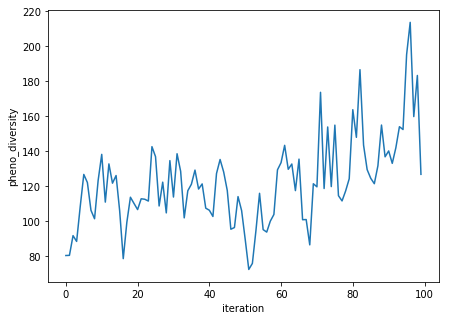

In [38]:
plt.subplots(figsize=(7,5))
sns.lineplot(x="iteration",
             y="pheno_diversity",
             hue=None,
             data=diversity,
            palette= "rocket",
            err_style="band",
            legend="full")

In [23]:
sns.scatterplot(x="Pheno_Sta", y="elite.fitness", data=diversity)

In [20]:
sns.regplot(x="Geno_Sta", y="elite.fitness", data=diversity)